In [1]:
import pandas as pd

import sys
import ujson
import pprint
import numpy as np
from operator import itemgetter
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# For displaying google maps
import gmplot
from IPython.display import IFrame

# Second (better?) google map, only inline so far
import gmaps

# For summary stats
import scipy
from scipy import stats

from influxdb import DataFrameClient
#from influxdb import InfluxDBClient


pp = pprint.PrettyPrinter(indent=4)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Testing auto adding time output to all cells
'''
#To install...
wget https://raw.githubusercontent.com/cpcloud/ipython-autotime/master/autotime.py
#Make available via
jupyter nbextension install /Users/patrickmulrooney/class/notebooks/pjmulroo/DSECapstone/autotime.py
'''
 
%load_ext autotime

In [3]:
def log_progress(sequence, every=None, size=None):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{index} / ?'.format(index=index)
                else:
                    progress.value = index
                    label.value = u'{index} / {size}'.format(
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = str(index or '?')


time: 30.3 ms


In [4]:
# Read config from local file
GMAP_API_KEY = None

sys.path.append('/Users/patrickmulrooney/Desktop/')
import capstone_config

time: 4.85 ms


In [5]:
GMAP_API_KEY = capstone_config._GMAP_API_KEY
gmaps.configure(api_key=GMAP_API_KEY)

time: 1.39 ms


In [6]:
dbname = 'endomondo'
client = DataFrameClient('localhost', 8086, 'root', 'root', dbname)

time: 2.09 ms


In [7]:
endoHRbike = client.query("select * from \"bike (transport)\"")['bike (transport)']

time: 2min 55s


In [8]:
endoHRbike.groupby('workoutId').max().groupby('userId').count().sort_values(by='altitude')[-5:]

,altitude,gender,heart_rate,latitude,longitude,speed,ts
userId,,,,,,,
1049894,419,419,419,419,419,0,419
3351234,433,433,433,433,433,6,433
4446822,565,565,565,565,565,44,565
4997910,856,856,856,856,856,1,856
2734298,1218,1218,1218,1218,1218,311,1218


time: 27.2 s


In [9]:
transports = {}
for i in endoHRbike.groupby('userId').first().index.values:
    transports[i] = endoHRbike[endoHRbike['userId'] == i].reset_index()

time: 3.63 s


(array([ 188.,  259.,    0.,  237.,    0.,  239.,  227.,    0.,   35.,   33.]), array([ 0. ,  0.6,  1.2,  1.8,  2.4,  3. ,  3.6,  4.2,  4.8,  5.4,  6. ]), <a list of 10 Patch objects>)


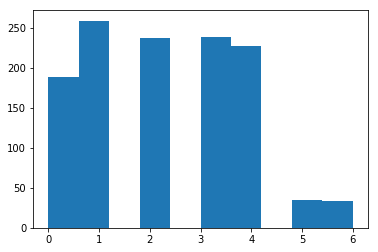

time: 17.6 s


In [10]:
idx = 2734298

m = gmaps.Map()
heatmap_layer = gmaps.Heatmap(data=[list(_i) for _i in list(transports[idx][['latitude','longitude']].values)])

m.add_layer(heatmap_layer)

heatmap_layer.max_intensity = 10
heatmap_layer.point_radius = 2

t = transports[idx].groupby('workoutId').max()['index']
print plt.hist([t.iloc[_i].dayofweek for _i in range(len(t))])



In [36]:
m

time: 3.1 ms


(array([ 178.,  259.,    0.,  219.,    0.,   29.,  160.,    0.,   10.,    1.]), array([ 0. ,  0.6,  1.2,  1.8,  2.4,  3. ,  3.6,  4.2,  4.8,  5.4,  6. ]), <a list of 10 Patch objects>)


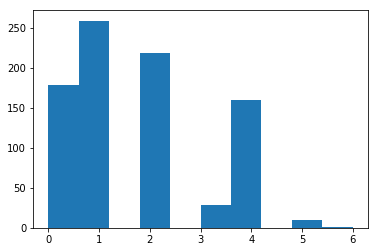

time: 12.5 s


In [12]:
idx = 4997910

m = gmaps.Map()
heatmap_layer = gmaps.Heatmap(data=[list(_i) for _i in list(transports[idx][['latitude','longitude']].values)])

m.add_layer(heatmap_layer)

heatmap_layer.max_intensity = 100
heatmap_layer.point_radius = 2

t = transports[idx].groupby('workoutId').max()['index']
print plt.hist([t.iloc[_i].dayofweek for _i in range(len(t))])

In [34]:
m

time: 30.4 ms


(array([  61.,  127.,    0.,  125.,    0.,  120.,   98.,    0.,   33.,    1.]), array([ 0. ,  0.6,  1.2,  1.8,  2.4,  3. ,  3.6,  4.2,  4.8,  5.4,  6. ]), <a list of 10 Patch objects>)


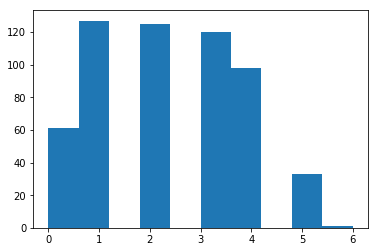

time: 8.15 s


In [14]:
idx = 4446822

m = gmaps.Map()
heatmap_layer = gmaps.Heatmap(data=[list(_i) for _i in list(transports[idx][['latitude','longitude']].values)])

m.add_layer(heatmap_layer)

heatmap_layer.max_intensity = 100
heatmap_layer.point_radius = 2

t = transports[idx].groupby('workoutId').max()['index']
print plt.hist([t.iloc[_i].dayofweek for _i in range(len(t))])

In [35]:
m

time: 8.42 ms


In [16]:
idx = 3351234

m = gmaps.Map()
heatmap_layer = gmaps.Heatmap(data=[list(_i) for _i in list(transports[idx][['latitude','longitude']].values)])

m.add_layer(heatmap_layer)

heatmap_layer.max_intensity = 100
heatmap_layer.point_radius = 2

time: 4.73 s


Day of week


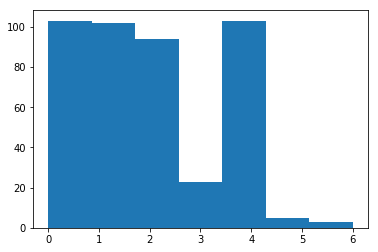

time: 946 ms


In [17]:
t = transports[idx].groupby('workoutId').max()['index']
plt.hist([t.iloc[_i].dayofweek for _i in range(len(t))], bins=7 )
print 'Day of week'
plt.show()

Start hour


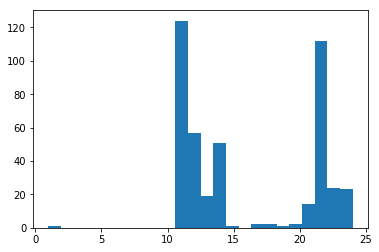

time: 1.04 s


In [18]:
t = transports[idx].groupby('workoutId').min()['index']
plt.hist([t.iloc[_i].hour+1 for _i in range(len(t))],bins=24)
print 'Start hour'
plt.show()

End hour


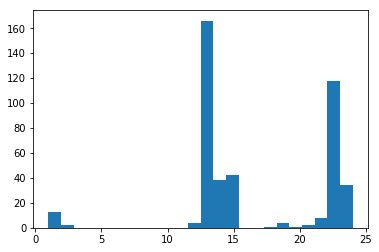

time: 987 ms


In [19]:
t = transports[idx].groupby('workoutId').max()['index']
plt.hist([t.iloc[_i].hour+1 for _i in range(len(t))],bins=24)
print 'End hour'
plt.show()

In [20]:
transports[idx].max()

index         2014-07-07 12:16:05+00:00
altitude                        468.745
gender                             male
heart_rate                          203
latitude                        51.5448
longitude                       4.47989
speed                           60.4596
ts                           1404735365
userId                          3351234
workoutId                      98694504
dtype: object

time: 979 ms


In [28]:
print "All days combined"
m

All days combined
time: 297 ms


In [29]:
m = gmaps.Map()
heatmap_layer = gmaps.Heatmap(data=[list(_i)[0:2] for _i in list(transports[idx][['latitude','longitude','index']].values) if _i[2].dayofweek == 0])

m.add_layer(heatmap_layer)

heatmap_layer.max_intensity = 100
heatmap_layer.point_radius = 2
print "Sunday"
m

Sunday
time: 6.15 s


In [30]:
m = gmaps.Map()
heatmap_layer = gmaps.Heatmap(data=[list(_i)[0:2] for _i in list(transports[idx][['latitude','longitude','index']].values) if _i[2].dayofweek == 1])

m.add_layer(heatmap_layer)

heatmap_layer.max_intensity = 100
heatmap_layer.point_radius = 2
print "Monday"
m

Monday
time: 3.72 s


In [31]:
m = gmaps.Map()
heatmap_layer = gmaps.Heatmap(data=[list(_i)[0:2] for _i in list(transports[idx][['latitude','longitude','index']].values) if _i[2].dayofweek == 2])

m.add_layer(heatmap_layer)

heatmap_layer.max_intensity = 100
heatmap_layer.point_radius = 2
print "Tuesday"
m

Tuesday
time: 5.33 s


In [32]:
m = gmaps.Map()
heatmap_layer = gmaps.Heatmap(data=[list(_i)[0:2] for _i in list(transports[idx][['latitude','longitude','index']].values) if _i[2].dayofweek == 3])

m.add_layer(heatmap_layer)

heatmap_layer.max_intensity = 100
heatmap_layer.point_radius = 2
print "Wednesday"
m

Wednesday
time: 1.61 s


In [33]:
m = gmaps.Map()
heatmap_layer = gmaps.Heatmap(data=[list(_i)[0:2] for _i in list(transports[idx][['latitude','longitude','index']].values) if _i[2].dayofweek == 5])

m.add_layer(heatmap_layer)

heatmap_layer.max_intensity = 100
heatmap_layer.point_radius = 2
print "Thursday"
m

Thursday
time: 1.7 s


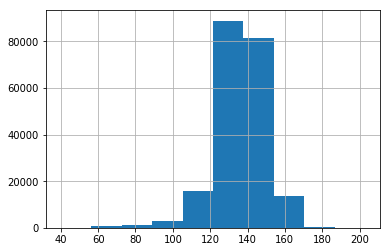

time: 324 ms


In [27]:
transports[idx]['heart_rate'].hist()